In [1]:
import pandas as pd

### Import Data

In [2]:
df = pd.read_csv('.\data\housing.csv')

In [3]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
df = df.dropna()

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Train Test Split

In [6]:
df = df.sample(frac= 1, random_state= 2) #shuffle the dataset
train_df = df[:17000] # Train set is the first 17000 rows
train_df = train_df.reset_index(drop= True)
test_df = df[17000:]
test_df = test_df.reset_index(drop= True)


In [7]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY
1,-119.95,36.80,30.0,1233.0,214.0,620.0,199.0,3.4297,112500.0,INLAND
2,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,4.4107,213400.0,<1H OCEAN
3,-122.24,37.79,27.0,1632.0,492.0,1171.0,429.0,2.3173,125000.0,NEAR BAY
4,-121.45,36.86,11.0,1613.0,335.0,1617.0,342.0,3.1375,146200.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16995,-117.87,33.87,16.0,1332.0,368.0,1534.0,295.0,3.0227,297100.0,<1H OCEAN
16996,-120.00,38.87,12.0,1437.0,268.0,395.0,144.0,4.2250,127600.0,INLAND
16997,-121.47,38.50,17.0,1895.0,424.0,620.0,417.0,1.7188,137500.0,INLAND
16998,-118.86,34.21,26.0,3354.0,659.0,2020.0,648.0,4.1576,211800.0,<1H OCEAN


In [8]:
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.07,33.87,28.0,2399.0,436.0,1613.0,429.0,3.6339,220100.0,<1H OCEAN
1,-118.26,34.02,40.0,1259.0,362.0,1499.0,327.0,1.8382,126400.0,<1H OCEAN
2,-118.51,34.16,23.0,11154.0,1995.0,4076.0,1809.0,5.4609,500001.0,<1H OCEAN
3,-120.04,36.95,36.0,1528.0,347.0,1334.0,304.0,1.3594,48300.0,INLAND
4,-117.91,33.65,24.0,1494.0,494.0,814.0,459.0,2.1074,181300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
3428,-121.60,39.80,10.0,1742.0,307.0,721.0,312.0,2.4537,117900.0,INLAND
3429,-122.48,38.31,29.0,2375.0,560.0,1124.0,502.0,2.3276,166200.0,<1H OCEAN
3430,-117.40,33.95,46.0,2189.0,423.0,866.0,389.0,3.1384,111500.0,INLAND
3431,-118.15,34.14,52.0,403.0,117.0,361.0,105.0,1.6250,187500.0,<1H OCEAN


In [9]:
y_train = train_df['median_house_value'].to_numpy()
y_test = test_df['median_house_value'].to_numpy()

In [10]:
y_train.shape, y_test.shape

((17000,), (3433,))

### PCA

In [11]:
# Correlation between total_rooms, total_bedrooms, households

train_df[['total_rooms', 'total_bedrooms', 'households']].corr()

,total_rooms,total_bedrooms,households
total_rooms,1.000000,0.931023,0.918161
total_bedrooms,0.931023,1.000000,0.979402
households,0.918161,0.979402,1.000000


In [12]:
import numpy as np

x_train_3 = train_df[['total_rooms', 'total_bedrooms', 'households']].to_numpy()
x_train_3.shape

(17000, 3)

In [13]:
x_test_3 = test_df[['total_rooms', 'total_bedrooms', 'households']].to_numpy()
x_test_3.shape

(3433, 3)

In [14]:
# Get error of the random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest = RandomForestRegressor(n_estimators= 50, max_depth= 5)
forest.fit(x_train_3, y_train)
forest_test_pred = forest.predict(x_test_3)

mean_absolute_error(y_test, forest_test_pred)

82051.80911257048

In [15]:
# Train PCA
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
pca = pca.fit(x_train_3)

pca

PCA(n_components=2)

In [16]:
# USe PCA to transform x_train_3 and x_test_3
x_train_pca = pca.transform(x_train_3)
x_test_pca = pca.transform(x_test_3)

x_train_pca.shape, x_test_pca.shape

((17000, 2), (3433, 2))

In [17]:
# Error of the random forest on PCA
forest_pca = RandomForestRegressor(n_estimators= 50, max_depth= 5)
forest_pca.fit(x_train_pca, y_train)
forest_test_pred_pca = forest_pca.predict(x_test_pca)

mean_absolute_error(y_test, forest_test_pred_pca)

79407.79869523125

### Scale

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
import matplotlib.pyplot as plt

In [19]:
scaler = StandardScaler().fit(x_train_3)
x_train_3_scaled = scaler.transform(x_train_3)
x_train_3_scaled 

array([[ 0.06141578,  0.08041603,  0.04664826],
       [-0.64492147, -0.76725387, -0.78510314],
       [ 0.69337772,  0.50896026,  0.62887424],
       ...,
       [-0.34285735, -0.27277976, -0.2184725 ],
       [ 0.32287007,  0.28056032,  0.38194804],
       [-0.73891725, -0.66364977, -0.65774121]])

(array([1.2712e+04, 3.4710e+03, 5.6300e+02, 1.4500e+02, 6.0000e+01,
        2.2000e+01, 1.6000e+01, 7.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([-1.2687919 ,  0.24853723,  1.76586636,  3.28319549,  4.80052461,
         6.31785374,  7.83518287,  9.352512  , 10.86984112, 12.38717025,
        13.90449938]),
 <BarContainer object of 10 artists>)

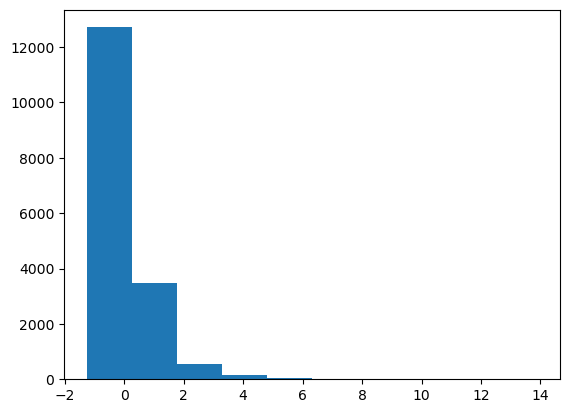

In [20]:
plt.hist(x_train_3_scaled[:,1])

In [34]:
# SCaling x_test
x_test_3_scaled = scaler.transform(x_test_3)
x_test_3_scaled

array([[-0.11288708, -0.2445241 , -0.18728182],
       [-0.63305792, -0.41876735, -0.45240258],
       [ 3.8819337 ,  3.42635751,  3.39964609],
       ...,
       [-0.20870803, -0.2751344 , -0.29125075],
       [-1.02364234, -0.99565382, -1.02943012],
       [-0.11471224, -0.25629729, -0.32763987]])

### Categorical encoding

In [22]:
train_dummies = pd.get_dummies(train_df['ocean_proximity'])
train_dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [23]:
train_df = pd.concat([train_df, train_dummies], axis= 1)
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY,0,0,0,1,0
1,-119.95,36.80,30.0,1233.0,214.0,620.0,199.0,3.4297,112500.0,INLAND,0,1,0,0,0
2,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,4.4107,213400.0,<1H OCEAN,1,0,0,0,0
3,-122.24,37.79,27.0,1632.0,492.0,1171.0,429.0,2.3173,125000.0,NEAR BAY,0,0,0,1,0
4,-121.45,36.86,11.0,1613.0,335.0,1617.0,342.0,3.1375,146200.0,INLAND,0,1,0,0,0


In [24]:
train_df['ocean_proximity'].value_counts()

<1H OCEAN     7522
INLAND        5408
NEAR OCEAN    2172
NEAR BAY      1895
ISLAND           3
Name: ocean_proximity, dtype: int64

In [25]:
train_df.drop('ISLAND', inplace= True, axis= 1)
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY,0,0,1,0
1,-119.95,36.80,30.0,1233.0,214.0,620.0,199.0,3.4297,112500.0,INLAND,0,1,0,0
2,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,4.4107,213400.0,<1H OCEAN,1,0,0,0
3,-122.24,37.79,27.0,1632.0,492.0,1171.0,429.0,2.3173,125000.0,NEAR BAY,0,0,1,0
4,-121.45,36.86,11.0,1613.0,335.0,1617.0,342.0,3.1375,146200.0,INLAND,0,1,0,0


In [26]:
x_train_dummies = train_df.to_numpy()[:, -4:]
x_train_dummies

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]], dtype=object)

In [27]:
x_train_dummies.shape

(17000, 4)

In [28]:
test_dummies = pd.get_dummies(test_df['ocean_proximity'])
test_df = pd.concat([test_df, test_dummies], axis= 1)
test_df.drop('ISLAND', inplace= True, axis= 1)
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-118.07,33.87,28.0,2399.0,436.0,1613.0,429.0,3.6339,220100.0,<1H OCEAN,1,0,0,0
1,-118.26,34.02,40.0,1259.0,362.0,1499.0,327.0,1.8382,126400.0,<1H OCEAN,1,0,0,0
2,-118.51,34.16,23.0,11154.0,1995.0,4076.0,1809.0,5.4609,500001.0,<1H OCEAN,1,0,0,0
3,-120.04,36.95,36.0,1528.0,347.0,1334.0,304.0,1.3594,48300.0,INLAND,0,1,0,0
4,-117.91,33.65,24.0,1494.0,494.0,814.0,459.0,2.1074,181300.0,<1H OCEAN,1,0,0,0


In [31]:
x_test_dummies = test_df.to_numpy()[:, -4:]
x_test_dummies

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]], dtype=object)

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_dummies, y_train)
y_test_pred_dummies = lr.predict(x_test_dummies)
mean_absolute_error(y_test, y_test_pred_dummies)

77095.0289334857

### Binning

In [36]:
train_df['median_age_less_30'] = (train_df['housing_median_age'] < 30).astype('int')
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,median_age_less_30
0,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY,0,0,1,0,0
1,-119.95,36.80,30.0,1233.0,214.0,620.0,199.0,3.4297,112500.0,INLAND,0,1,0,0,0
2,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,4.4107,213400.0,<1H OCEAN,1,0,0,0,1
3,-122.24,37.79,27.0,1632.0,492.0,1171.0,429.0,2.3173,125000.0,NEAR BAY,0,0,1,0,1
4,-121.45,36.86,11.0,1613.0,335.0,1617.0,342.0,3.1375,146200.0,INLAND,0,1,0,0,1


### Clustering

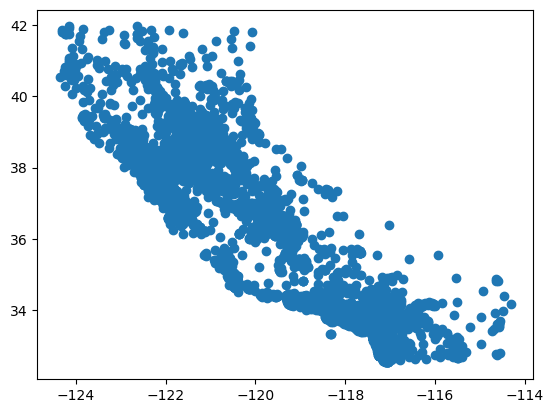

In [37]:
plt.scatter(train_df['longitude'], train_df['latitude'])

In [ ]:
kmeans = KMeans(n_clusters= 7).fit(x_train_kmeans)
kmeans.labels_

In [42]:
# K Means model
from sklearn.cluster import KMeans

x_train_kmeans = train_df[['longitude', 'latitude']].to_numpy()
x_train_kmeans
kmeans = KMeans(n_clusters= 7).fit(x_train_kmeans)
kmeans.labels_

c:\Users\Ha Tung Lam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'